# AF2 predictions benchmark 

In [139]:
import json
import os
import pandas as pd
import glob
results_dir = "/home/luisasantus/Desktop/crg_cluster/projects/structural_regression/results/"

In [140]:
def get_plddt(results_dir, dataset):
    colabfold_dir = results_dir+dataset+"/structures/colabfold_header/"
    for fam in os.listdir(colabfold_dir):
        fam_dir = os.path.join(colabfold_dir,fam)
        print(fam_dir)
        for f in os.listdir(fam_dir):
            if f.endswith('plddt.eval'):
                plddts = pd.read_csv(os.path.join(fam_dir,f), sep = "\s+", header = None)
                plddts = plddts.set_axis(["sequence", "plddt"], axis=1)
                plddts["family"] = fam
                plddts["benchmarking_dataset"] = dataset
                return(plddts)

In [142]:
# Extract plddt for each sequence in the family
af2_homfam = get_plddt(results_dir, "homfam")
af2_homfam.family.value_counts()

/home/luisasantus/Desktop/crg_cluster/projects/structural_regression/results/homfam/structures/colabfold_header/seatoxin


seatoxin    93
Name: family, dtype: int64

In [143]:
# Summarize plddt family-wise
af2_homfam_summary = af2_homfam.groupby(['family', "benchmarking_dataset"]).agg({'plddt': ['mean', 'min', 'max']}).reset_index().set_axis(["family", "benchmarking_dataset", "plddt_mean", "plddt_min", "plddt_max"], axis=1)
af2_homfam_summary.head()

,family,benchmarking_dataset,plddt_mean,plddt_min,plddt_max
0,seatoxin,homfam,64.221655,55.1243,71.2845


## Store files 

In [144]:
af2_homfam.to_csv(os.path.join("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/stats/", "02_summary_af2.csv"), index = False)
af2_homfam_summary.to_csv(os.path.join("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/stats/", "03_summary_af2_grouped.csv"), index = False)

# Visualize 

### How well does AF2 perform on the sequences in the families in the different datasets

/home/luisasantus/.local/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


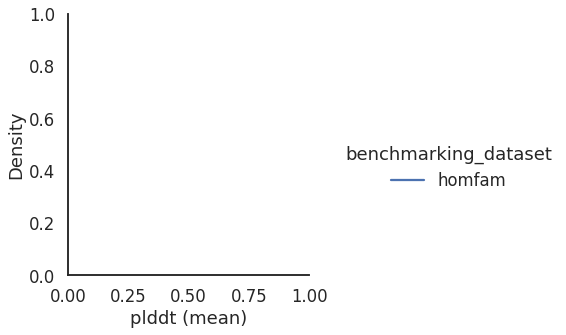

In [145]:
# Plot AF2 plddts summaries across families 
af2_homfam_summary
sns.set_theme(style="white")
sns.set_context("talk")
ax = sns.displot(af2_homfam_summary, x="plddt_mean", hue = "benchmarking_dataset", kind="kde")
ax.set(xlabel='plddt (mean)')